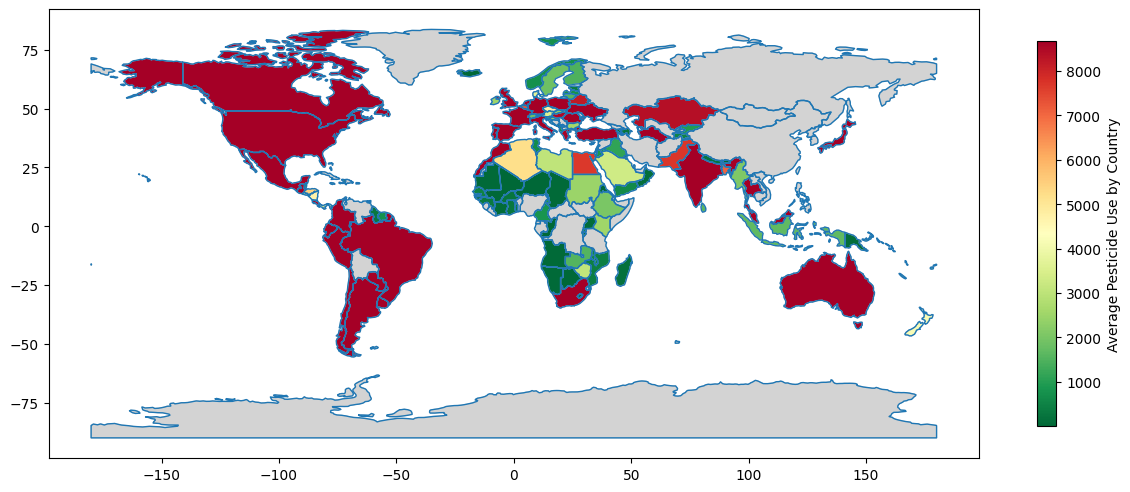

In [194]:
average_pesticides_by_country = pest_df.groupby('Country')['Pesticides'].mean().reset_index()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.set_index('name').join(average_pesticides_by_country.set_index('Country'))
norm = Normalize(vmin=merged['Pesticides'].min(), vmax=merged['Pesticides'].quantile(0.75))

# Plotting the data with adjusted color normalization
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='Pesticides', ax=ax, legend=True,
            legend_kwds={'label': "Average Pesticide Use by Country", 'shrink': 0.5},
            cmap='RdYlGn_r', linewidth=0.8, edgecolor='0.8', missing_kwds={'color': 'lightgrey'},
            norm=norm)

plt.show()

Consider changing to altair if able, I wasn't able to get it to work